### 雅思作文

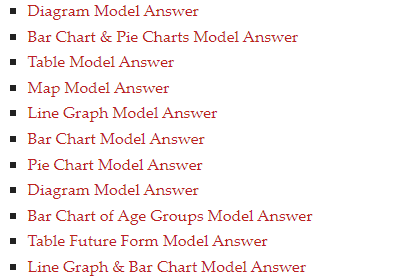

### (1)輸入一篇英文作文,程式會幫忙批改作文，可以找錯字、文法錯誤、還有是否合乎主題
雅思的作文第一大題是圖表類型
主要有六種分別是Diagram,Bar,Table,Map,Line,pie
可以解決沒有老師時無人批改作文的慘況

### (2)讓使用者輸入一篇作文 可以返回錯字、文法錯誤、和他的文章類別

### (3)使用這個程式可以和許多範文進行比對，看看自己的文章是否合乎主題
###   主題為雅思第一大題(圖表題)，主要常考六種
###   0:Diagram  1:Bar  2:Table  3:Map  4:Line  5:Pie

### (4)使用BERT、Gradio、Scrapy、pyspellchecker、language-tool-python

### (5)因為我準備要考雅思，但是有時候作文沒人幫我看真的很困擾，所以剛好借此機會試作一個可以幫我改作文的小幫手

### (6)程式區塊：

## 檢查錯字

In [32]:
!pip install pyspellchecker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 15.0 MB/s eta 0:00:00


In [34]:
from spellchecker import SpellChecker

def spell_check(text):
    spell = SpellChecker(language='en')

    # 把作文分割成單字
    errors = spell.unknown(text.split())

    return errors

if __name__ == "__main__":
    #輸入作文
    count=0
    essay = "The pie charts show the admount of revenue and expditures in 2016 for a children’s charity in the USA. Overall, it can be seen that donated food accounted for the majority of the income, while program services accounted for the most expenditure. Total revenue sources just exceeded outgoings.In detail, donated food provided most of the revenue for the charity, at 86%. Similarly, with regard to expenditures, one category, program services, accounted for nearly all of the outgoings, at 95.8%. The other categories were much smaller. Community contributions, which wedare the second largest revenue source, brought in 10.4% of overall income, and this was followed by proram revenue, at 2.2%. Investment icome, goverawdnment grants, and otdher income were very small sourcdes of revenue, accounting for only 0.8% combined.There were only two other expenditure items, fundraising and management and general, accounting for 2.6% and 1.6% respectively. The total amount of income was $53,561,580, which was just enough to cover the expenditures of $53,224,896."

    # 檢查錯誤
    spelling_errors = spell_check(essay)

    # 輸出錯誤單字
    if spelling_errors:
        print("Spelling errors found:")
        for error in spelling_errors:
            print("- ", error)
            count+=1
    else:
        print("No spelling errors found. Good job!")
print(count)

Spelling errors found:
-  items,
-  goverawdnment
-  children’s
-  grants,
-  similarly,
-  2.2%.
-  2.6%
-  admount
-  0.8%
-  general,
-  charity,
-  detail,
-  expditures
-  usa.
-  $53,224,896.
-  $53,561,580,
-  proram
-  outgoings.in
-  outgoings,
-  1.6%
-  95.8%.
-  income,
-  overall,
-  smaller.
-  category,
-  otdher
-  source,
-  sourcdes
-  combined.there
-  services,
-  revenue,
-  86%.
-  respectively.
-  expenditures,
-  wedare
-  10.4%
-  icome,
-  expenditure.
-  contributions,
39


## 檢查文法

In [36]:
#下載支援檢查文法的套件
!pip install language-tool-python

In [37]:
from language_tool_python import LanguageTool

def check_grammar(text):
    error_count = 0
    tool = LanguageTool('en-US')

    # 檢查語法錯誤
    matches = tool.check(text)

    # 輸出錯誤的地方
    if matches:
        print("Grammar errors found:")
        for match in matches:
            print("Error:", match.ruleId)
            print("Description:", match.message)
            print("Suggestions:", match.replacements)
            print("")
        error_count += len(matches)
    return error_count

if __name__ == "__main__":
    # 獲取文章輸入
    text = "The pie charts show the amount of revenue and expenditures in 2016 for a children’s charity in the USA. Overall, it can be seen that donated food accounted for the majority of the income, while program services accounted for the most expenditure. Total revenue sources just exceeded outgoings.In detail, donated food provided most of the revenue for the charity, at 86%. Similarly, with regard to expenditures, one category, program services, accounted for nearly all of the outgoings, at 95.8%. The other categories were much smaller. Community contributions, which were the second largest revenue source, brought in 10.4% of overall income, and this was followed by program revenue, at 2.2%. Investment income, government grants, and other income were very small sources of revenue, accounting for only 0.8% combined.There were only two other expenditure items, fundraising and management and general, accounting for 2.6% and 1.6% respectively. The total amount of income was $53,561,580, which was just enough to cover the expenditures of $53,224,896."

    # 計算錯誤數量
    error_count = check_grammar(text)
    print("Total errors:", error_count)


INFO:language_tool_python.download_lt:Unzipping /tmp/tmp1ya9uqa3.zip to /root/.cache/language_tool_python.
INFO:language_tool_python.download_lt:Downloaded https://www.languagetool.org/download/LanguageTool-6.4.zip to /root/.cache/language_tool_python.


Grammar errors found:
Error: SENTENCE_WHITESPACE
Description: Add a space between sentences.
Suggestions: [' In']

Error: ALL_OF_THE
Description: Consider removing “of” to be more concise
Suggestions: ['all the']

Error: SECOND_LARGEST_HYPHEN
Description: It appears that a hyphen is missing.
Suggestions: ['second-largest']

Error: SENTENCE_WHITESPACE
Description: Add a space between sentences.
Suggestions: [' There']

Total errors: 4


## 收集資料集

In [ ]:
!pip install scrapy

In [ ]:
#上去爬Ielts的作文 網站：IELT LIZ
!scrapy runspider Ielts.py

2024-04-14 13:59:55 [scrapy.utils.log] INFO: Scrapy 2.11.1 started (bot: scrapybot)
2024-04-14 13:59:55 [scrapy.utils.log] INFO: Versions: lxml 4.9.4.0, libxml2 2.10.3, cssselect 1.2.0, parsel 1.9.1, w3lib 2.1.2, Twisted 24.3.0, Python 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0], pyOpenSSL 24.1.0 (OpenSSL 3.2.1 30 Jan 2024), cryptography 42.0.5, Platform Linux-6.1.58+-x86_64-with-glibc2.35
2024-04-14 13:59:55 [scrapy.addons] INFO: Enabled addons:
[]
/usr/local/lib/python3.10/dist-packages/scrapy/utils/request.py:254: ScrapyDeprecationWarning: '2.6' is a deprecated value for the 'REQUEST_FINGERPRINTER_IMPLEMENTATION' setting.

It is also the default value. In other words, it is normal to get this warning if you have not defined a value for the 'REQUEST_FINGERPRINTER_IMPLEMENTATION' setting. This is so for backward compatibility reasons, but it will change in a future version of Scrapy.

See the documentation of the 'REQUEST_FINGERPRINTER_IMPLEMENTATION' setting for information on

## 主題判別+使用介面（合併功能）

In [4]:
pip install transformers

In [18]:
import pandas as pd
data = pd.read_excel('./ielts.xlsx')
data

,Text,Label
0,Should not the second last sentence in the sec...,0
1,"After rigorous rotation ,we get concrete as th...",0
2,"lt;br&gt;As required, the cement is spun in a ...",0
3,The diagrams depict the process of cement prod...,0
4,Please correct my mistakes and guess the band ...,0
5,"At first, limestone and clay is passed through...",0
6,"Firstly, the limestones and clay will pass thr...",0
7,lt;br&gt;The two diagrams show the different s...,0
8,"On the other hand, it has been observed with t...",0
9,"In the first picture , clay and lime stone...",0


In [19]:
import pandas as pd
from transformers import BertTokenizer, BertModel
import torch
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

In [52]:
# 加載預訓練好的Tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

#我的dataset(已經Label)
data = pd.read_excel('./ielts.xlsx')
texts = data['Text']
labels = data['Label']

In [22]:
max_seq_length = 512  #匹配長度

encoded_texts = []

for text in texts:
    # 分詞標記
    tokenized_text = tokenizer.encode(text, add_special_tokens=True)

    # 超過最大長度捨棄
    if len(tokenized_text) > max_seq_length:
        tokenized_text = tokenized_text[:max_seq_length]

    # 轉換數據成tensor
    encoded_texts.append(torch.tensor(tokenized_text))

处理后的编码文本列表长度: 60


In [57]:
# 計算每一篇文章的Bert
with torch.no_grad():
    model.eval()
    encoded_texts = torch.nn.utils.rnn.pad_sequence(encoded_texts, batch_first=True, padding_value=0)
    outputs = model(encoded_texts)
    last_hidden_states = outputs.last_hidden_state

# 為了使用Logistic Regression需轉成二維
flattened_texts = last_hidden_states.view(last_hidden_states.size(0), -1).numpy()

train_inputs, test_inputs, train_labels, test_labels = train_test_split(flattened_texts, labels, test_size=0.2, random_state=42)

# Training
classifier = LogisticRegression()
classifier.fit(train_inputs, train_labels)

# Prediction
predictions = classifier.predict(test_inputs)

# Evaluation
accuracy = accuracy_score(test_labels, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.25


In [58]:
import joblib

# 保存模型與分類器
torch.save(model.state_dict(), 'bert_model.pth')
joblib.dump(classifier, 'classifier.pkl')

['classifier.pkl']

In [59]:
# 加載BERT模型
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# 加載分類器
classifier = joblib.load('classifier.pkl')

# 加载已保存的模型参數
model.load_state_dict(torch.load('bert_model.pth'))

# 文本
essay_text = "The pie charts show the amount of revenue and expenditures in 2016 for a children’s charity in the USA. Overall, it can be seen that donated food accounted for the majority of the income, while program services accounted for the most expenditure. Total revenue sources just exceeded outgoings.In detail, donated food provided most of the revenue for the charity, at 86%. Similarly, with regard to expenditures, one category, program services, accounted for nearly all of the outgoings, at 95.8%. The other categories were much smaller. Community contributions, which were the second largest revenue source, brought in 10.4% of overall income, and this was followed by program revenue, at 2.2%. Investment income, government grants, and other income were very small sources of revenue, accounting for only 0.8% combined.There were only two other expenditure items, fundraising and management and general, accounting for 2.6% and 1.6% respectively. The total amount of income was $53,561,580, which was just enough to cover the expenditures of $53,224,896."

# 預處裡成512長度
encoded_essay = tokenizer(essay_text, return_tensors='pt', max_length=512, padding='max_length', truncation=True)

# 預測
with torch.no_grad():
    outputs = model(encoded_texts)
    last_hidden_states = outputs.last_hidden_state
    flattened_texts = last_hidden_states.view(last_hidden_states.size(0), -1).numpy()

predictions = classifier.predict(flattened_texts)

In [61]:
#結果
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 4, 3, 3, 4, 3, 3, 3, 4, 4, 4, 4,
       4, 2, 3, 4, 0, 4, 0, 5, 5, 5, 5, 5, 5, 4, 5, 5])

In [67]:
#把前面的程式碼合併功能，使用gradio當成介面
import gradio as gr
from spellchecker import SpellChecker
from language_tool_python import LanguageTool
import torch
from transformers import BertTokenizer, BertModel
import joblib
import numpy as np

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

classifier = joblib.load('classifier.pkl')

model.load_state_dict(torch.load('bert_model.pth'))

spell = SpellChecker(language='en')
tool = LanguageTool('en-US')

def check_spell_grammar_and_predict_category(essay):

    spell_errors_count = 0
    grammar_errors_count = 0

    spelling_errors = spell.unknown(essay.split())
    spell_errors_count = len(spelling_errors)


    matches = tool.check(essay)
    grammar_errors_count = len(matches)


    spell_errors_msg = "\n".join([f"- {error}" for error in spelling_errors])
    grammar_errors_msg = "\n".join([f"Error: {match.ruleId}\nDescription: {match.message}\nSuggestions: {match.replacements}\n" for match in matches])


    encoded_essay = tokenizer(essay, return_tensors='pt', max_length=512, padding='max_length', truncation=True)


    with torch.no_grad():
        outputs = model(**encoded_essay)
        last_hidden_states = outputs.last_hidden_state
        flattened_essay = last_hidden_states.view(last_hidden_states.size(0), -1).numpy()


    predictions = classifier.predict(flattened_essay)

    return f"Spelling errors found: {spell_errors_count}\n{spell_errors_msg}", f"Grammar errors found: {grammar_errors_count}\n{grammar_errors_msg}", f"Predicted category: {predictions}"

# gradio介面
interface = gr.Interface(fn=check_spell_grammar_and_predict_category, inputs="text", outputs=["text", "text", "text"], title="Spell, Grammar, and Category Checker", description="Enter your essay to check for spelling and grammar errors and predict its category.")
interface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://fe25947920c677ab83.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
